ChatGPT Tweets Sentiment Analysis

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("/content/file.csv")
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


Data Preprocessing

In [ ]:
df = df[['tweets', 'labels']]
df.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
for i in df.tweets.head(10):
    print(i)
    print()

ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

As of 2 minutes ago, @OpenAI release

In [ ]:
df['tweet_list'] = df['tweets'].str.split('https:')
df.head()

,tweets,labels,tweet_list
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,[ChatGPT: Optimizing Language Models for Dialo...
1,"Try talking with ChatGPT, our new AI system wh...",good,"[Try talking with ChatGPT, our new AI system w..."
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,[ChatGPT: Optimizing Language Models for Dialo...
3,"THRILLED to share that ChatGPT, our new model ...",good,"[THRILLED to share that ChatGPT, our new model..."
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,"[As of 2 minutes ago, @OpenAI released their n..."


In [ ]:
text = [i[0] for i in df.tweet_list]
df['text'] = text
df = df[['text', 'labels']]
df.head()

,text,labels
0,ChatGPT: Optimizing Language Models for Dialogue,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialogue,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
import re

string = r'[A-Za-z0-9 ]'

trim_list=[]

for row in text:
    s=''
    for letter in row:
        if bool(re.match(string, letter)):
            s+=letter
    trim_list.append(s)

In [ ]:
rep_list = ['\U0001fae1', '\\n', '@', '#', '\xa0', '***']

for i in trim_list:
    for j in rep_list:
        if j in i:
            i.replace(j,'')
df['text'] = trim_list
df['msg_lower']= df['text'].apply(lambda x: x.lower())
df.head()

,text,labels,msg_lower
0,ChatGPT Optimizing Language Models for Dialogue,neutral,chatgpt optimizing language models for dialogue
1,Try talking with ChatGPT our new AI system whi...,good,try talking with chatgpt our new ai system whi...
2,ChatGPT Optimizing Language Models for Dialogue,neutral,chatgpt optimizing language models for dialogue
3,THRILLED to share that ChatGPT our new model o...,good,thrilled to share that chatgpt our new model o...
4,As of 2 minutes ago OpenAI released their new ...,bad,as of 2 minutes ago openai released their new ...


In [ ]:
df = df[['msg_lower', 'labels']]
for i in df.msg_lower.head(10):
    print(i)
    print()

chatgpt optimizing language models for dialogue 

try talking with chatgpt our new ai system which is optimized for dialogue your feedback will help us improve it 

chatgpt optimizing language models for dialogue 

thrilled to share that chatgpt our new model optimized for dialog is now public free and accessible to everyone 

as of 2 minutes ago openai released their new chatgpt nnand you can use it right now  

just launched chatgpt our new ai system which is optimized for dialogue 

as of 2 minutes ago openai released their new chatgpt nnand you can use it right now n n

chatgpt coming out strong refusing to help me stalk someone but agreeing providing that someone is waldo 

0penal just deployed a thing ive been helping build the last couple of months its a chatbot based on gpt 3 im really excited to share this vln

research preview of our newest model chatgptnnwere trying something new with this preview free and immediately available for everyone no waitlist 



Data Visualization with word cloud

In [ ]:
pip install wordcloud

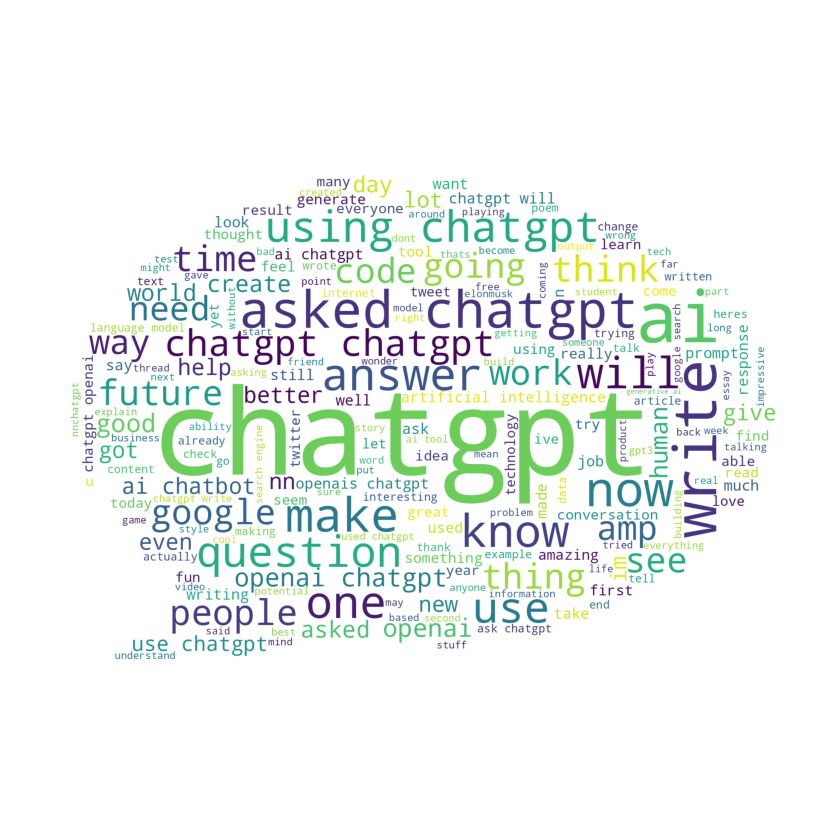

In [ ]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

comment_words = ''
stopwords = set(STOPWORDS)


for val in df.msg_lower:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

mask = np.array(Image.open("/content/comment.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, mask=mask).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Model Selection

In [ ]:
df['lab_int'] = np.where(df['labels']=='good', 1, np.where(df['labels']=='bad', -1, 0))
# Import sci-kit learn models for classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score, accuracy_score, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(df['msg_lower'], df['lab_int'], test_size=0.3, random_state=1)
vec = CountVectorizer(
    ngram_range=(1, 3),
    stop_words="english",
)

X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.76      0.93      0.83     32288
           0       0.72      0.29      0.41     16710
           1       0.66      0.77      0.71     16791

    accuracy                           0.72     65789
   macro avg       0.71      0.66      0.65     65789
weighted avg       0.72      0.72      0.69     65789



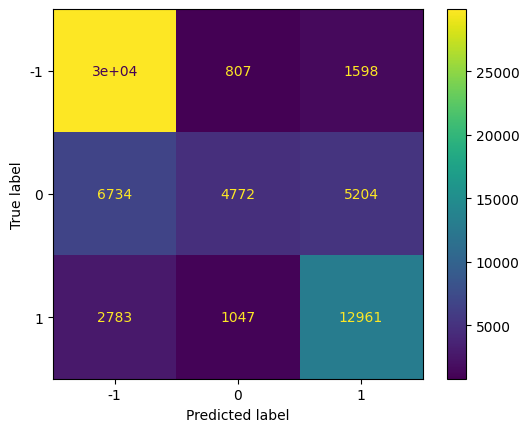

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1,0,1])

cm_display.plot()
plt.show()